In [ ]:
# customary imports:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import glob
import os
import tqdm
from sklearn.model_selection import StratifiedKFold

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


[[ 34  33  61  61]
 [ 89  67  29  29]
 [150  34  61  61]
 [ 77 141  39  39]]


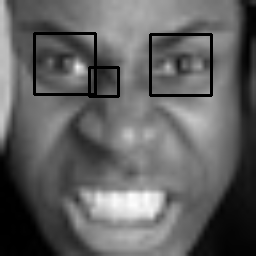

In [ ]:
# import required libraries
import cv2
from google.colab.patches import cv2_imshow

# read input image
img = cv2.imread('/content/gdrive/MyDrive/images/train/angry/3442.jpg')

# convert to grayscale of each frames
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, dsize=(256,256))
# read the haarcascade to detect the eyes in an image
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# detects eyes of within the detected face area (roi)
eyes = eye_cascade.detectMultiScale(img)
print(eyes)

# draw a rectangle around eyes
for (ex,ey,ew,eh) in eyes[:-1]:
    cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,255),2)
cv2_imshow(img)

[[109 111  32  32]
 [ 52  58  51  51]
 [169  54  44  44]]


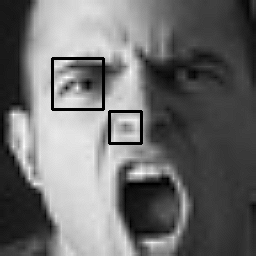

In [ ]:
# import required libraries
import cv2
from google.colab.patches import cv2_imshow

# read input image
img = cv2.imread('/content/gdrive/MyDrive/images/train/angry/2100.jpg')
# convert to grayscale of each frames
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, dsize=(256,256))

#sharpen kernel
kernel = np.array([[0, -1, 0],
              [-1, 5,-1],
              [0, -1, 0]])
img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

# read the haarcascade to detect the eyes in an image
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# detects eyes of within the detected face area (roi)
eyes = eye_cascade.detectMultiScale(img)
print(eyes)

# draw a rectangle around eyes
for (ex,ey,ew,eh) in eyes[:-1]:
    cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,255),2)
cv2_imshow(img)

In [ ]:
print(len(eyes))

1


In [ ]:
(x, y, w, h) = eyes[0]
l,r,t,b = 0,256,y,y+h
l,r,t,b

(0, 256, 131, 158)

In [ ]:
256/2

128.0

In [ ]:
left_e = eyes[0]
right_e = eyes[1]
x1,y1,w1,h1 = left_e
x2,y2,w2,h2 = right_e
l,r,t,b = min(x1,x2),max(x1+w1,x2+w2),max(y1+h1,y2+h2),min(y1,y2)

IndexError: ignored

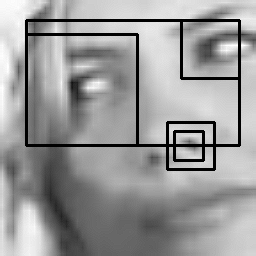

In [ ]:
cv2.rectangle(img,(l,t),(r,b),(0,255,255),2)
cv2_imshow(img)

In [ ]:
eyes[:-1]


array([[ 61,  64,  59,  59],
       [138,  76,  50,  50]], dtype=int32)

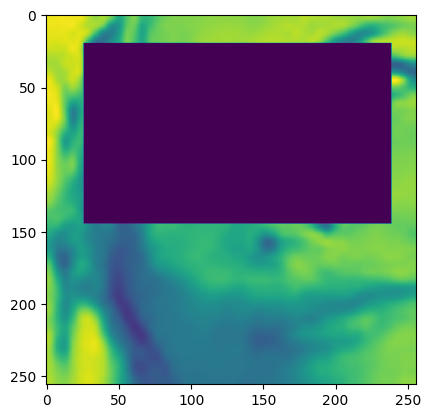

In [ ]:
img = Image.open('/content/gdrive/MyDrive/images/train/angry/3203.jpg').resize([256,256])
img = np.array(img).astype(np.float32)
img[b:t, l:r] = 0
plt.imshow(img)

In [ ]:
l,r,t,b

(26, 239, 145, 20)

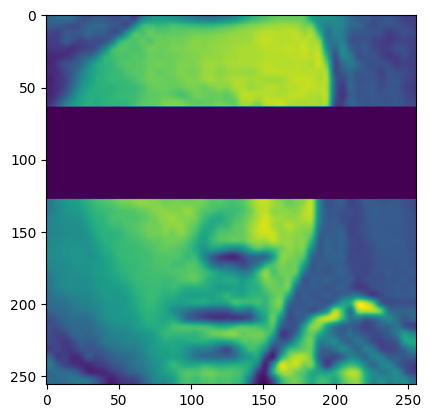

In [ ]:
img = Image.open('/content/gdrive/MyDrive/images/train/angry/0.jpg').resize([256,256])
img = np.array(img).astype(np.float32)
l,r,b,t = 0,256,int(256/4),int(256/2)
img[b:t,l:r] = 0
plt.imshow(img)

## Masking

## Eye

In [ ]:
from tensorflow.python.ops.gen_logging_ops import image_summary
def load_extract_normalize(image_path, normalized=True):
    # Read the input image and resize
    img = cv2.imread(image_path)
    img = cv2.resize(img, dsize=(256,256))
    # Convert into grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #sharpen kernel
    kernel = np.array([
                      [0, -1, 0],
                      [-1, 5,-1],
                      [0, -1, 0]])
    img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

    # Detect eyes
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    eyes = eye_cascade.detectMultiScale(img)

    # crop eyes
    if len(eyes)>=3:
        for potential_eye in eyes:
            

        left_e = eyes[0]
        right_e = eyes[1]
        x1,y1,w1,h1 = left_e
        x2,y2,w2,h2 = right_e
        l,r,b,t = min(x1,x2),max(x1+w1,x2+w2),max(y1+h1,y2+h2),min(y1,y2)
        if r-l<t-b:
            l,r,t,b = 0,256,int(256/4),int(256/2)
    elif len(eyes) == 1:
        (x, y, w, h) = eyes[0]
        l,r,t,b = 0,256,y,y+h
        if t > 256/2:
            l,r,t,b = 0,256,int(256/4),int(256/2)
    else:
        l,r,t,b = 0,256,int(256/4),int(256/2)

    # img = Image.open(image_path).resize([256,256])
    img[t:b,l:r] = 0

    if len(img.shape)==3:
        img = img.sum(axis=2)
    if normalized:
        return np.array(img).astype(np.float32) / 255.0
    else:
        return np.array(img).astype(np.float32)

2362


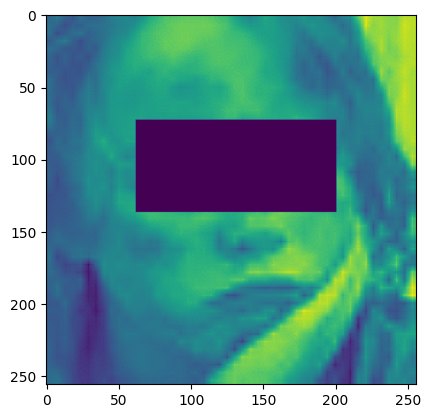

2100


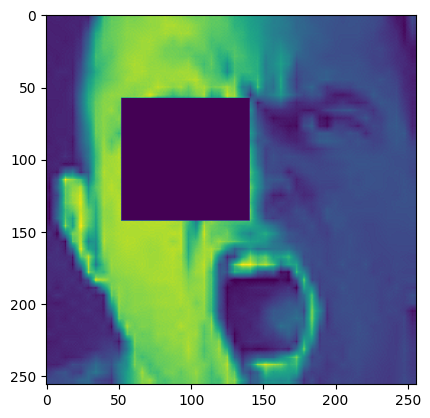

In [ ]:
nums = np.random.randint(0,3500,10)
for n in nums:
  path = '/content/gdrive/MyDrive/images/train/angry/'+str(n)+'.jpg'
  try:
    img = load_extract_normalize(path, normalized=True)
    print(n)
    plt.imshow(img)
    plt.show()
  except:
    pass


In [ ]:
# code to load all the data, assuming dataset is at /workspaces/awesome-ml-group/00_source_data/images/train
emo_types = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
emo_inds = np.arange(0, len(emo_types))
x_data = []
y_data = []

# Load the cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

for emo_ind in emo_inds:
    all_images = glob.glob(os.path.join('/content/gdrive/MyDrive/images/train', emo_types[emo_ind],'*.jpg'))
    # x_data += [load_extract_normalize(image_path) for image_path in all_images]
    x_data += [load_extract_normalize(image_path) for image_path in all_images]
    y_data += [emo_ind]*len(all_images)

(23064, 256, 256, 1) (23064, 7)
(5767, 256, 256, 1) (5767, 7)


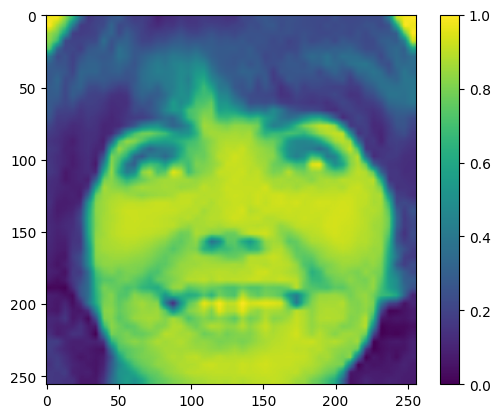

In [ ]:
# adding a fake color channel
x_data = np.array(x_data).reshape(-1, 256, 256, 1)
y_data = np.array(y_data)

folder = StratifiedKFold(5, shuffle=True)
x_indices = np.arange(0, len(x_data))
train_indices, val_indices = folder.split(x_indices, y_data).__next__()
# shuffling
np.random.shuffle(train_indices)

x_train = x_data[train_indices]
y_train = np.eye(len(emo_types))[y_data[train_indices]]

x_val = x_data[val_indices]
y_val = np.eye(len(emo_types))[y_data[val_indices]]

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

plt.imshow(x_train[0,:,:,0])
plt.colorbar()